In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
names = pd.read_json('winemag-data-130k-v2.json')

In [5]:
df = pd.DataFrame.from_dict(names, orient = 'columns')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
df.dropna(subset = ['price','points'], inplace=True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,None,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [7]:
desc = df.groupby(['country']).describe().reset_index()
print(desc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 17 columns):
(country, )        42 non-null object
(points, count)    42 non-null float64
(points, mean)     42 non-null float64
(points, std)      40 non-null float64
(points, min)      42 non-null float64
(points, 25%)      42 non-null float64
(points, 50%)      42 non-null float64
(points, 75%)      42 non-null float64
(points, max)      42 non-null float64
(price, count)     42 non-null float64
(price, mean)      42 non-null float64
(price, std)       40 non-null float64
(price, min)       42 non-null float64
(price, 25%)       42 non-null float64
(price, 50%)       42 non-null float64
(price, 75%)       42 non-null float64
(price, max)       42 non-null float64
dtypes: float64(16), object(1)
memory usage: 5.7+ KB
None


In [8]:
# Формируем фреймворк для вывода данных. Хотим посмотреть 10 стран, производящих самое высокооцененное вино
desc_for_draw = desc.sort_values(by = ('points','max')).head(10)
desc_for_draw

country points                                          \
                            count       mean       std   min    25%   50%   
29                    Peru   16.0  83.562500  1.860779  80.0  82.00  84.0   
33                Slovakia    1.0  87.000000       NaN  87.0  87.00  87.0   
4   Bosnia and Herzegovina    2.0  86.500000  2.121320  85.0  85.75  86.5   
40                 Ukraine   14.0  84.071429  1.591530  82.0  83.00  84.0   
1                  Armenia    2.0  87.500000  0.707107  87.0  87.25  87.5   
5                   Brazil   47.0  84.659574  2.451943  80.0  83.00  85.0   
9                    China    1.0  89.000000       NaN  89.0  89.00  89.0   
11                  Cyprus   11.0  87.181818  1.601136  85.0  86.00  87.0   
24               Macedonia   12.0  86.833333  1.749459  84.0  85.75  87.0   
32                  Serbia   12.0  87.500000  1.314257  86.0  86.00  87.5   

                price                                                        
      75%   max count       mean        std   min    25%   50%    75%   max  
29  85.00  86.0  16.0  18.062500  13.664888  10.0  14.00  14.5  17.00  68.0  
33  87.00  87.0   1.0  16.000000        NaN  16.0  16.00  16.0  16.00  16.0  
4   87.25  88.0   2.0  12.500000   0.707107  12.0  12.25  12.5  12.75  13.0  
40  84.75  88.0  14.0   9.214286   2.190138   6.0   9.00   9.0  10.00  13.0  
1   87.75  88.0   2.0  14.500000   0.707107  14.0  14.25  14.5  14.75  15.0  
5   86.00  89.0  47.0  23.765957  11.053649  10.0  15.00  20.0  29.00  60.0  
9   89.00  89.0   1.0  18.000000        NaN  18.0  18.00  18.0  18.00  18.0  
11  88.50  89.0  11.0  16.272727   2.831639  11.0  14.50  16.0  17.50  21.0  
24  88.00  89.0  12.0  15.583333   1.443376  15.0  15.00  15.0  15.25  20.0  
32  89.00  89.0  12.0  24.500000  10.264679  15.0  17.50  21.0  29.50  42.0

<BarContainer object of 10 artists>

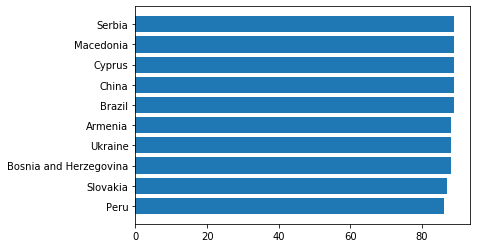

In [9]:
plt.barh(desc_for_draw['country'],desc_for_draw['points']['max'])

In [10]:
# Хотим посмотреть десять стран с самым дорогим вином
desc_for_draw = desc.sort_values(by = ('price','max')).head(10)
desc_for_draw

country points                                          \
                            count       mean       std   min    25%   50%   
40                 Ukraine   14.0  84.071429  1.591530  82.0  83.00  84.0   
4   Bosnia and Herzegovina    2.0  86.500000  2.121320  85.0  85.75  86.5   
1                  Armenia    2.0  87.500000  0.707107  87.0  87.25  87.5   
33                Slovakia    1.0  87.000000       NaN  87.0  87.00  87.0   
9                    China    1.0  89.000000       NaN  89.0  89.00  89.0   
19                   India    9.0  90.222222  1.715938  87.0  90.00  90.0   
24               Macedonia   12.0  86.833333  1.749459  84.0  85.75  87.0   
11                  Cyprus   11.0  87.181818  1.601136  85.0  86.00  87.0   
23              Luxembourg    6.0  88.666667  0.816497  88.0  88.00  88.5   
27                 Morocco   28.0  88.571429  1.687175  85.0  88.00  88.5   

                price                                                       
      75%   max count       mean       std   min    25%   50%    75%   max  
40  84.75  88.0  14.0   9.214286  2.190138   6.0   9.00   9.0  10.00  13.0  
4   87.25  88.0   2.0  12.500000  0.707107  12.0  12.25  12.5  12.75  13.0  
1   87.75  88.0   2.0  14.500000  0.707107  14.0  14.25  14.5  14.75  15.0  
33  87.00  87.0   1.0  16.000000       NaN  16.0  16.00  16.0  16.00  16.0  
9   89.00  89.0   1.0  18.000000       NaN  18.0  18.00  18.0  18.00  18.0  
19  91.00  93.0   9.0  13.333333  3.640055  10.0  12.00  12.0  13.00  20.0  
24  88.00  89.0  12.0  15.583333  1.443376  15.0  15.00  15.0  15.25  20.0  
11  88.50  89.0  11.0  16.272727  2.831639  11.0  14.50  16.0  17.50  21.0  
23  89.00  90.0   6.0  23.333333  4.633213  16.0  22.25  23.0  25.25  30.0  
27  89.25  93.0  28.0  19.500000  5.903546  14.0  16.50  18.0  18.00  40.0

<BarContainer object of 10 artists>

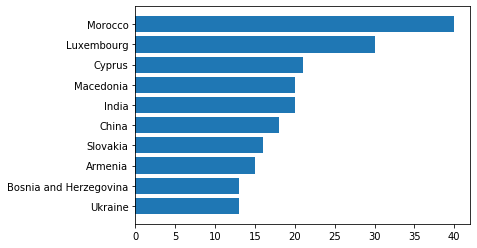

In [11]:
plt.barh(desc_for_draw['country'],desc_for_draw['price']['max'])

<BarContainer object of 42 artists>

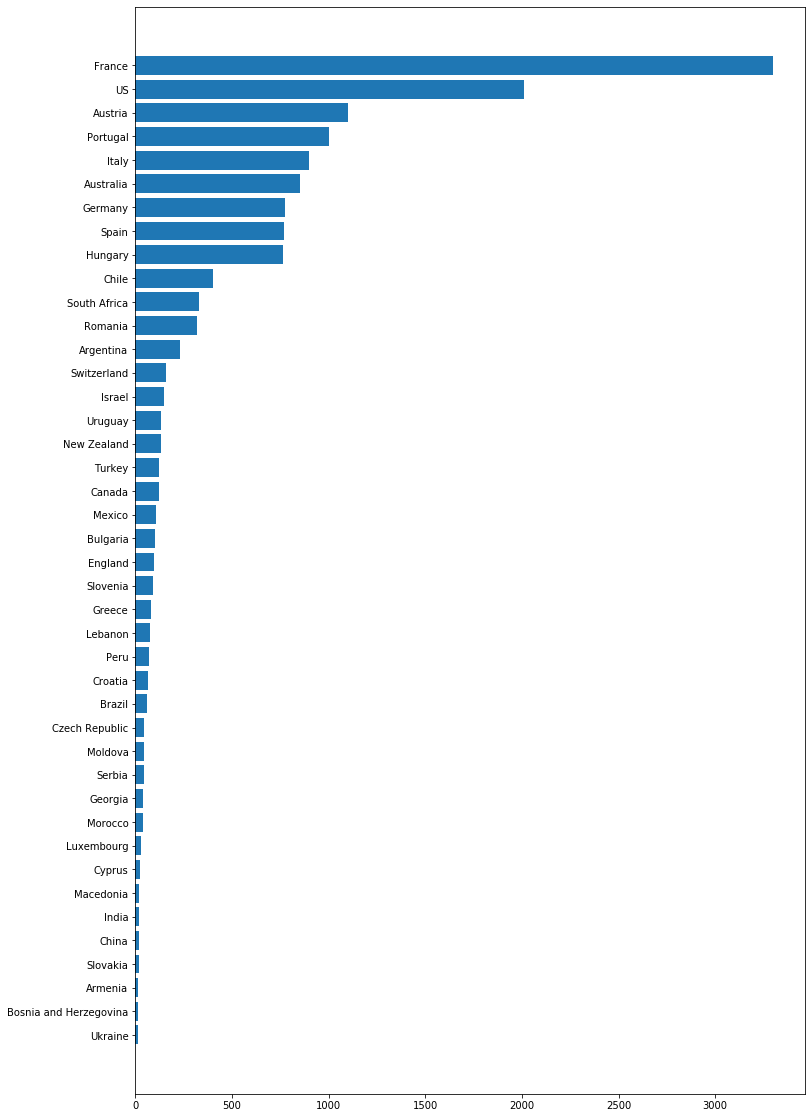

In [12]:
# Меняем масштаб график, чтобы вошли все страны с выводом максимальной цены
rcParams['figure.figsize'] = 12,20
desc = desc.sort_values(by =('price', 'max'))
plt.barh(desc['country'],desc['price']['max'])

<BarContainer object of 42 artists>

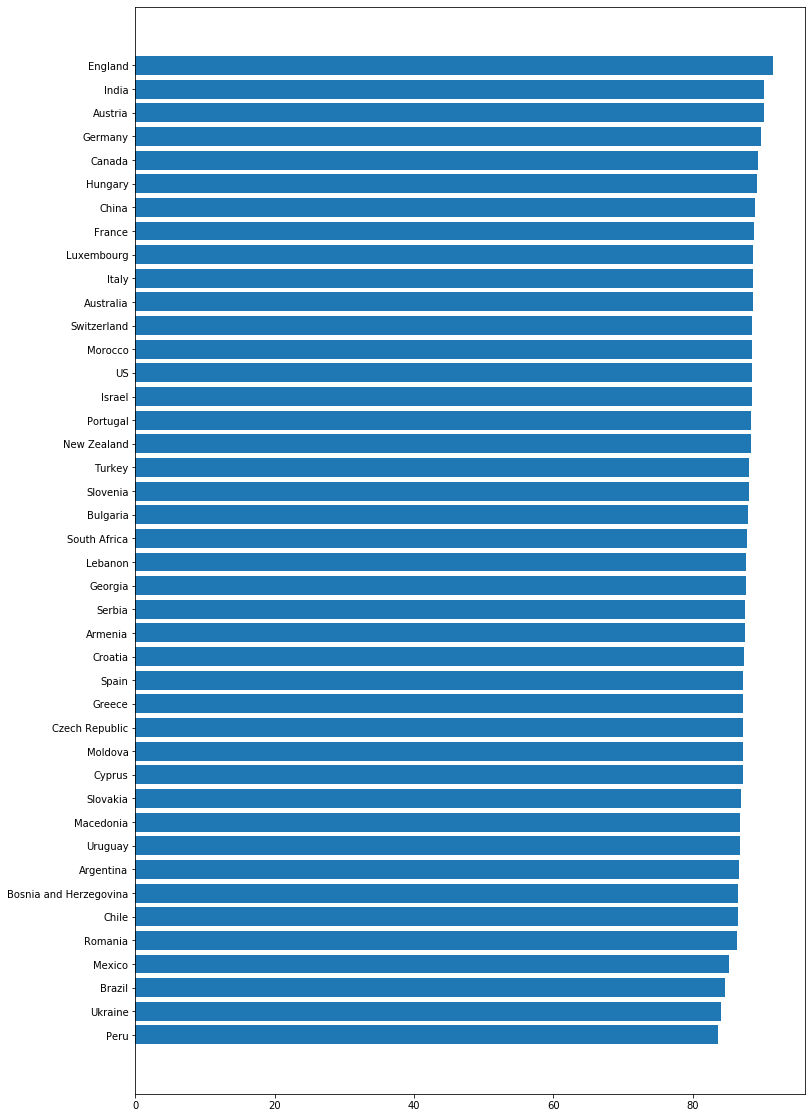

In [13]:
# Меняем масштаб график, чтобы вошли все страны с выводом средней оценки
desc = desc.sort_values(by =('points', 'mean'))
plt.barh(desc['country'],desc['points']['mean'])

C:\Anaconda\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


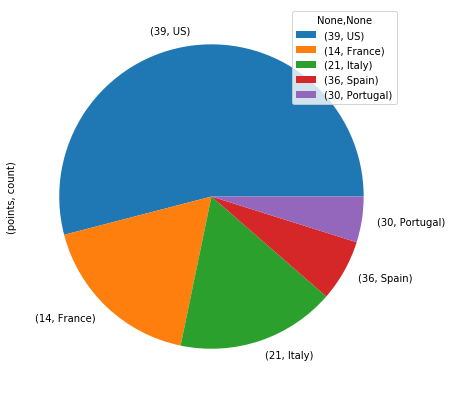

In [14]:
# Делаем попытку посмотреть распределение экспертов по странам. Берем пять самых оцениваемых стран 
rcParams['figure.figsize'] = 12,7
desc_for_draw = desc.groupby([desc.index, 'country']).sum().sort_values(('points','count'), ascending=False).head()
desc_for_draw.plot.pie(y = ('points','count'))

C:\Anaconda\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


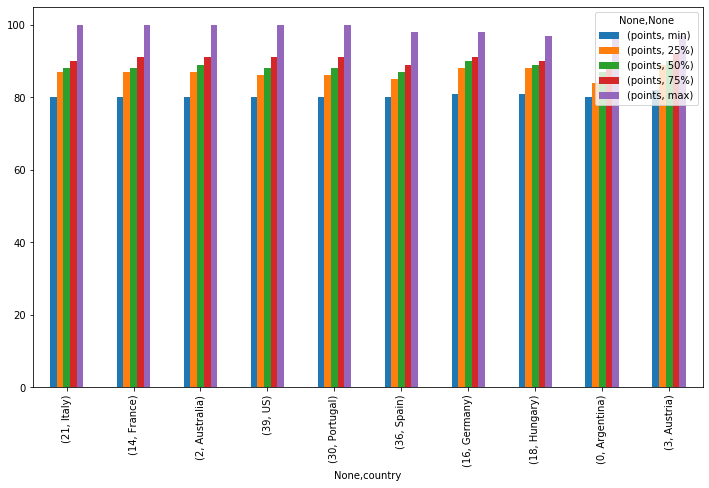

In [25]:
# Смотрим статистику оценок вин по странам
desc_for_draw = desc.groupby([desc.index, 'country']).sum().sort_values(('points','max'), ascending=False).head(10)
desc_for_draw.plot.bar(y = [('points','min'),('points','25%'),('points','50%'),('points','75%'),('points','max')])

In [26]:
import seaborn as sns

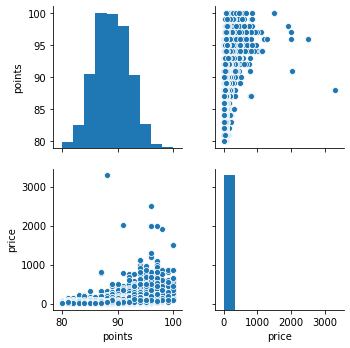

In [27]:
# Хочется понять,существует ли взаимосвязь между ценами и оценкой
sns_plot = sns.pairplot(
    df[['points', 'price']])
sns_plot

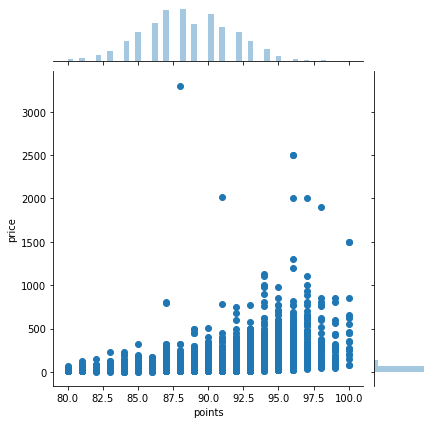

In [28]:
# Смотрим то же, но более детально
sns.jointplot(x='points', y='price', 
              data=df, kind='scatter')
sns_plot

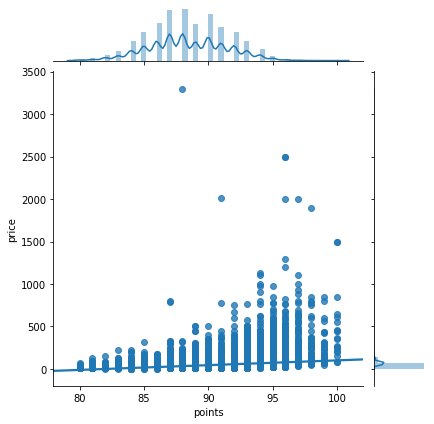

In [29]:
# Вывод средних позволяет предположить, что взаимосвязь все таки есть
sns.jointplot(x='points', y='price', 
              data=df, kind='reg')
sns_plot

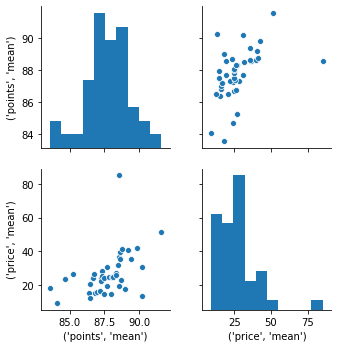

In [30]:
# Чтобы все-таки понять наличие взаимоствязи посмотрим на укрупненных данных. Сменим Датафрейм с уже усредненными данными 
sns_plot = sns.pairplot(
    desc[[('points','mean'), ('price','mean')]])
sns_plot

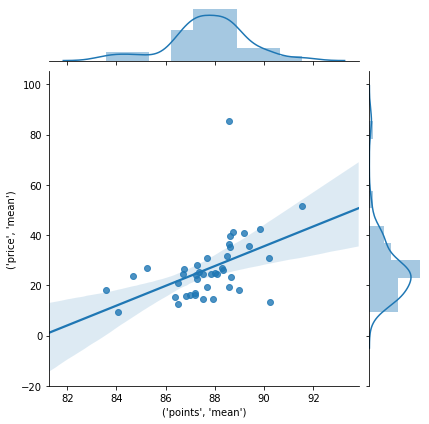

In [32]:
# Есть взаимосвязь
sns.jointplot(x=('points','mean'), y=('price','mean'), 
              data=desc, kind='reg')
sns_plot